In [1]:
from ipynb.fs.full.arl_libq import *
from functools import _lru_cache_wrapper

In [2]:
from scipy.stats import norm

distr = norm()
reals = distr.rvs(size=(50,100))
imags = distr.rvs(size=(50,100))
print(reals + 1j * imags)

[[ 0.26423223+0.07242294j -1.93968691+1.37479691j -0.47292156-1.53164008j
  ... -0.02738885+0.33320829j -0.53889301-2.24285513j
   1.39500587+0.54162392j]
 [ 0.0878031 +1.51544384j -0.3706613 +1.22133475j  0.59573724+0.20732734j
  ...  1.21807185+0.1402222j  -0.67003427-1.49971996j
   0.66944302+0.23926611j]
 [ 1.6023399 +1.13649029j -0.62513365-0.54749825j  0.35797554-1.07896133j
  ... -1.31717137+0.71979698j -0.87493497+0.50975188j
  -0.65153056+2.55999652j]
 ...
 [-0.23569774+0.07300163j  0.12827476+1.56939735j  0.02277197+1.44036457j
  ... -0.58250757-1.12894146j -1.87224348-0.32540053j
  -0.50735674+0.62504526j]
 [-1.14331388+0.12945195j  2.23771426-0.0997556j  -0.9339273 +2.02460517j
  ...  0.08745867+1.88743452j -0.79076465+1.19399795j
  -0.30378801-1.20238999j]
 [-0.90374635+1.48324334j  0.15340592-0.86274995j  0.27196566+0.15621113j
  ... -1.27927357+0.79885589j -1.87248699-0.44310279j
  -0.04630306+0.60923904j]]


In [3]:
arr = zpf(1000, 2, 1)
# %timeit np.trace(arr.T @ arr) 
# %timeit np.trace(arr @ arr.T)
# %timeit np.trace((arr @ arr.T if arr.shape[0] < arr.shape[1] else arr.T @ arr)) # fastest
print(np.trace(arr.T @ arr), np.trace(arr @ arr.T))

# Output:
# 10.1 ms ± 2.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
# 15 µs ± 1.97 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
# 12.7 µs ± 295 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

(58.62631570913376-11.430013035777453j) (58.62631570913382-11.430013035777446j)


In [4]:
print(np.eye(2) * np.ones((2,2)))           # elementwise product
print(np.eye(2) @ np.ones((2,2)))           # matrix product
print(np.kron(np.eye(2), np.ones((2,2))))   # kronecker product

[[1. 0.]
 [0. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]


/u/ronakr/installations/envs/arl-gbs/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/u/ronakr/installations/envs/arl-gbs/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


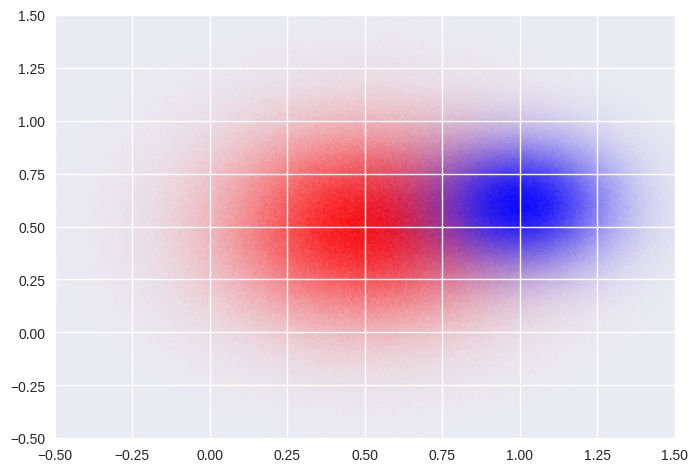

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

n = 10000000

x = np.random.normal(0.5, 0.3, n)
y = np.random.normal(0.5, 0.3, n)

ax.scatter_density(x, y, color='red')

x = np.random.normal(1.0, 0.2, n)
y = np.random.normal(0.6, 0.2, n)

ax.scatter_density(x, y, color='blue')

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)

fig.savefig('double.png')

In [6]:
def plot_scatter(x, y, title=None, color='blue', savefile=False, poly_regr_deg=None):

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

    if title:
        plt.title(label=title)

    ax.scatter_density(x, y, color=color)

    fit=None
    if poly_regr_deg:
        p = P.fit(x, y, poly_regr_deg, window=[np.min(x), np.max(x)])
        xx, yy = p.linspace()
        ax.plot(xx, yy, lw=2)
        at = AnchoredText(
            str(p), prop=dict(size=15), frameon=True, loc='upper left')
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
        fit = p
    
    ax.set_xlim(np.min(x), np.max(x))
    ax.set_ylim(np.min(y), np.max(y))

    if savefile:
        fig.savefig(savefile)

    return fit

In [7]:
def plot_complex(arr, **kwargs):
    plot_scatter(np.real(arr), np.imag(arr), **kwargs)

In [8]:
a,b = ent(N=1000000, r=1, t=2, phase=0)

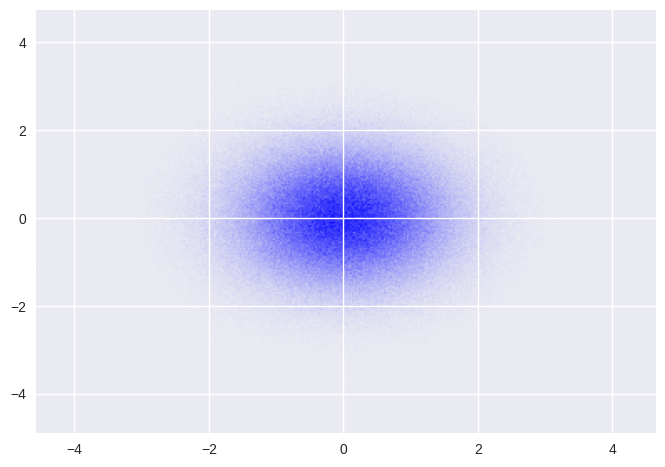

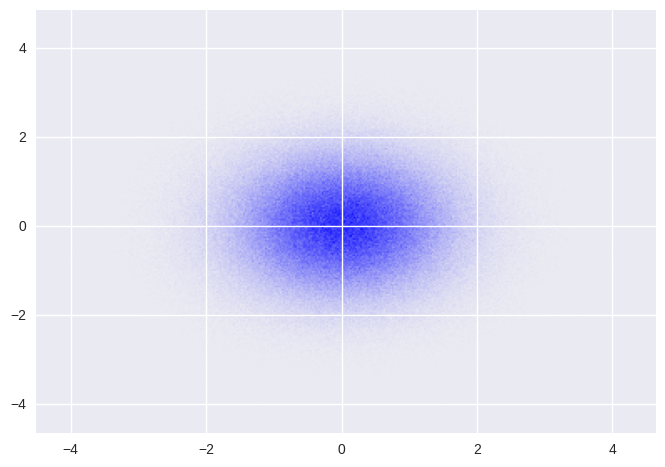

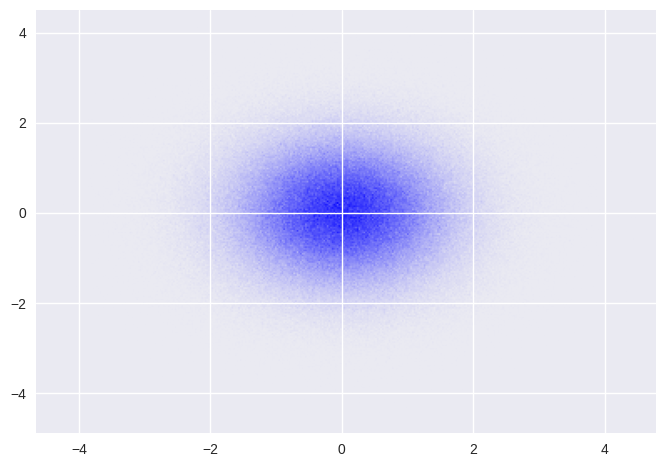

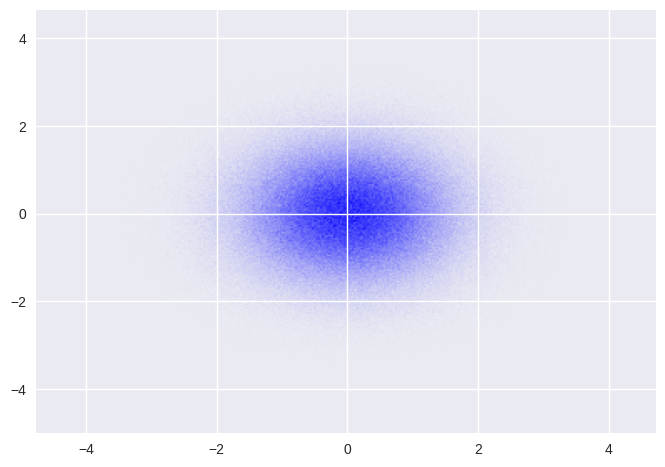

In [9]:
plot_complex(a[0,:])
plot_complex(a[1,:])
plot_complex(b[0,:])
plot_complex(b[1,:])

Polynomial([ 1.21702883, -0.00132378], domain=[1.83391561e-03, 5.14570365e+00], window=[1.83391561e-03, 5.14570365e+00])

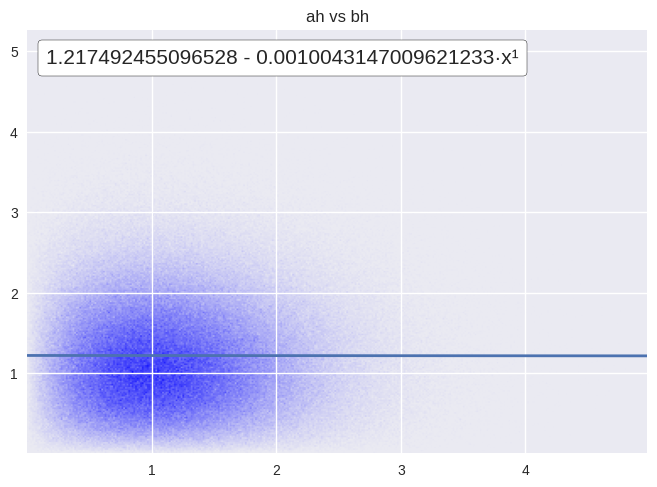

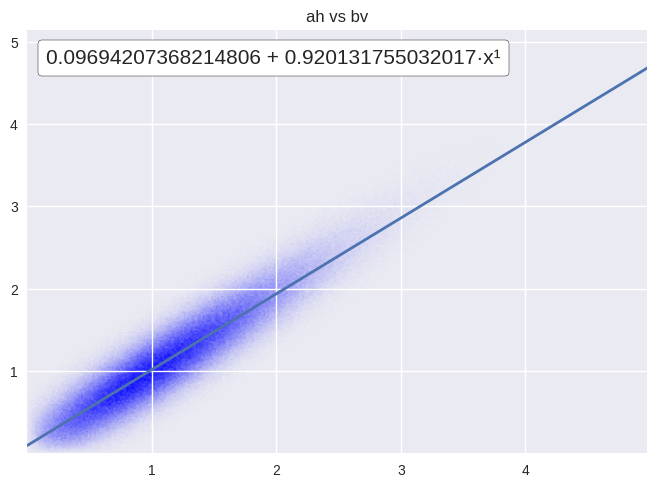

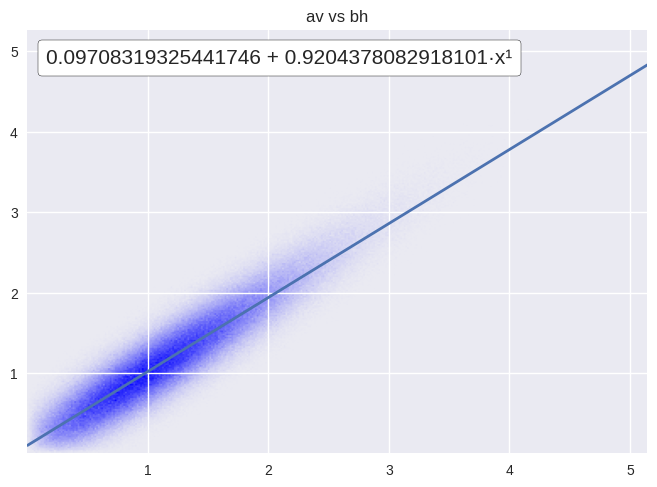

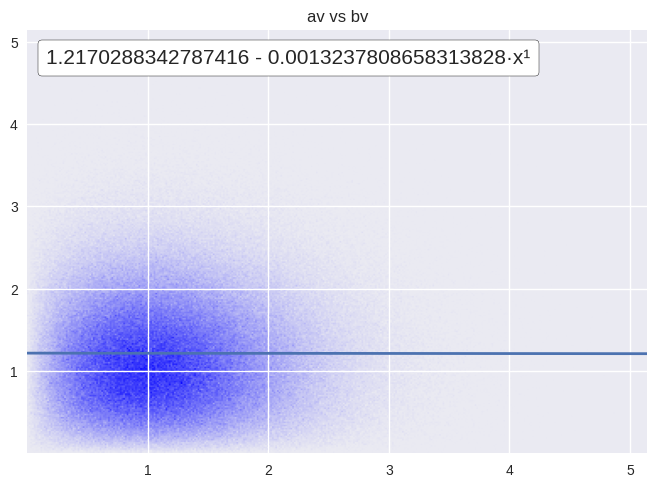

In [10]:
ah = np.abs(a[0,:])
av = np.abs(a[1,:])
bh = np.abs(b[0,:])
bv = np.abs(b[1,:])

plot_scatter(ah, bh, poly_regr_deg=1, title="ah vs bh")
plot_scatter(ah, bv, poly_regr_deg=1, title="ah vs bv")
plot_scatter(av, bh, poly_regr_deg=1, title="av vs bh")
plot_scatter(av, bv, poly_regr_deg=1, title="av vs bv")

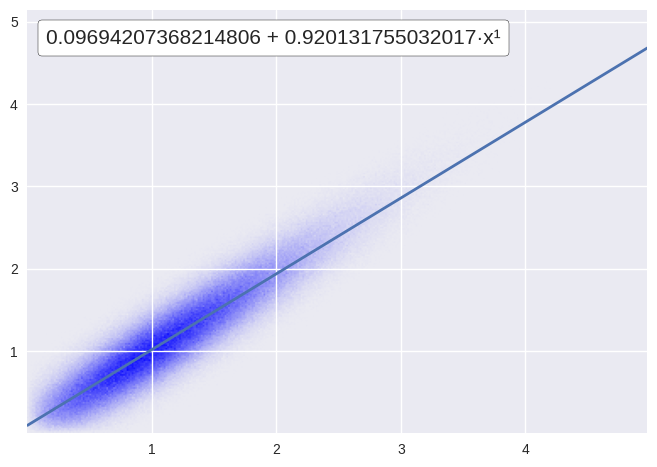

In [11]:
p = plot_scatter(ah, bv, poly_regr_deg=1, savefile='hv_vh_entangled.png')

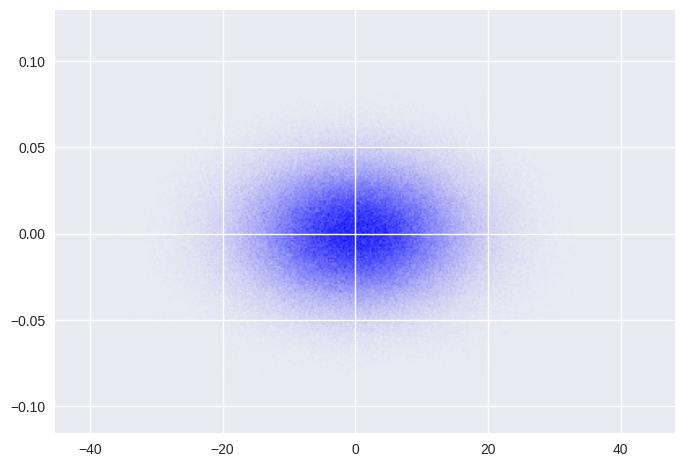

In [12]:
a = squeezed_zpf(1000000,r=3)
plot_scatter(np.real(a), np.imag(a))

In [13]:
# Failed: no way to distinguish |HH> + |VV> from |HH> - |VV> from probability distr alone

# def get_phase(c):
#     return np.arctan(np.imag(c)/np.real(c))
# phase_difference = get_phase(a[0,:]) - get_phase(b[1,:])

# plot hist

In [14]:
print(p)
print(p(0))
xx, yy = p.linspace()
print(xx[:10])
print(yy[:10])
print(p(xx[:10]))

0.09694207368214806 + 0.920131755032017·x¹
0.09694207368214806
[0.00059936 0.05090364 0.10120792 0.1515122  0.20181648 0.25212077
 0.30242505 0.35272933 0.40303361 0.45333789]
[0.09749356 0.14378013 0.1900667  0.23635326 0.28263983 0.3289264
 0.37521296 0.42149953 0.4677861  0.51407266]
[0.09749356 0.14378013 0.1900667  0.23635326 0.28263983 0.3289264
 0.37521296 0.42149953 0.4677861  0.51407266]


In [15]:
print(p)
print(p(0))
print(p(1)-p(0))
print(p(2)-p(1))

0.09694207368214806 + 0.920131755032017·x¹
0.09694207368214806
0.9201317550320172
0.9201317550320169


In [16]:
a,b = ent(N=1000000, r=1, t=2, phase=0)
np.set_printoptions(formatter={'complex_kind': '{:.3f}'.format})
#print(np.cov(a,b),2)
print(np.corrcoef(a,b))
#print(np.cov(a[0,:],b[0,:]))
print(np.corrcoef(a[0,:],b[0,:]))
#print(np.cov(a[0,:],b[1,:]))
print(np.corrcoef(a[0,:],b[1,:]))
#print(np.cov(a[1,:],b[0,:]))
print(np.corrcoef(a[1,:],b[0,:]))
#print(np.cov(a[1,:],b[1,:]))
print(np.corrcoef(a[1,:],b[1,:]))

# 0.5, 1.88, 13.66, 100.9, 745.66, 5501
# plot_scatter(np.linspace(0,5,6), [0.5, 1.88, 13.66, 100.9, 745.66, 5501], poly_regr_deg=5)


[[1.000+0.000j 0.000-0.000j -0.000+0.000j -0.001-0.000j]
 [0.000+0.000j 1.000+0.000j 0.001+0.001j -0.001+0.000j]
 [-0.000-0.000j 0.001-0.001j 1.000+0.000j 0.000+0.000j]
 [-0.001+0.000j -0.001-0.000j 0.000-0.000j 1.000+0.000j]]
[[1.000+0.000j -0.000+0.000j]
 [-0.000-0.000j 1.000+0.000j]]
[[1.000+0.000j -0.001-0.000j]
 [-0.001+0.000j 1.000+0.000j]]
[[1.000+0.000j 0.001+0.001j]
 [0.001-0.001j 1.000+0.000j]]
[[1.000+0.000j -0.001+0.000j]
 [-0.001-0.000j 1.000+0.000j]]


In [17]:
# from array import array

# d = {}
# a = array('i', [1,2,3])
# d[a] = 5.5

In [18]:
# this was my original implementation

@cache
def get_fock_basis_states(n, m, int_type=np.uint8):
    '''Returns a numpy array of all (n + m - 1 Choose n) Fock basis 
    states with n particles in m modes.'''

    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer")
    if not isinstance(m, int) or m < 1:
        raise ValueError("m must be a positive integer")
        
    if n > np.iinfo(int_type).max:
        raise ValueError(f"Ints larger than {np.iinfo(int_type).max} are not supported under type {int_type}.")

    if m == 1:
        return np.array([[n]], dtype=int_type)
    if n == 1:
        return np.eye(m, dtype=int_type)

    states = None
    for i in range(0,n+1):
        sub_states = get_fock_basis_states(n-i, m-1)
        first_mode = np.full((sub_states.shape[0],1), i)
        new_states = np.concatenate((first_mode, sub_states), axis=1)
        if i == 0:
            states = new_states
        else:
            states = np.concatenate((states, new_states))
    return states

In [19]:
@cache
def imp1(n, m, int_type=np.uint8):
    '''Returns a numpy array of all (n + m - 1 Choose n) Fock basis 
    states with n particles in m modes.'''

    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer")
    if not isinstance(m, int) or m < 1:
        raise ValueError("m must be a positive integer")
        
    if n > np.iinfo(int_type).max:
        raise ValueError(f"Ints larger than {np.iinfo(int_type).max} are not supported under type {int_type}.")

    return imp1_helper(n, m, int_type)

@cache
def imp1_helper(n, m, int_type=np.uint8):
    '''Returns a numpy array of all (n + m - 1 Choose n) Fock basis 
    states with n particles in m modes.'''

    if m == 1:
        return np.array([[n]], dtype=int_type)
    if n == 1:
        return np.eye(m, dtype=int_type)

    sub_states = imp1_helper(n, m-1)
    first_mode = np.full((sub_states.shape[0],1), 0)
    states = np.concatenate((first_mode, sub_states), axis=1)
    for i in range(1,n+1):
        sub_states = imp1_helper(n-i, m-1)
        first_mode = np.full((sub_states.shape[0],1), i)
        new_states = np.concatenate((first_mode, sub_states), axis=1)
        states = np.concatenate((states, new_states))
        
    return states

In [20]:
@cache
def imp11(n, m, int_type=np.uint8):
    '''Returns a numpy array of all (n + m - 1 Choose n) Fock basis 
    states with n particles in m modes.'''

    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer")
    if not isinstance(m, int) or m < 1:
        raise ValueError("m must be a positive integer")
        
    if n > np.iinfo(int_type).max:
        raise ValueError(f"Ints larger than {np.iinfo(int_type).max} are not supported under type {int_type}.")

    return tuple(map(tuple,imp1_helper(n, m, int_type)))

In [21]:
@cache
def imp12(n, m, int_type=np.uint8):
    '''Returns a numpy array of all (n + m - 1 Choose n) Fock basis 
    states with n particles in m modes.'''

    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer")
    if not isinstance(m, int) or m < 1:
        raise ValueError("m must be a positive integer")
        
    if n > np.iinfo(int_type).max:
        raise ValueError(f"Ints larger than {np.iinfo(int_type).max} are not supported under type {int_type}.")

    return list(map(tuple,imp1_helper(n, m, int_type)))

In [22]:
@cache
def imp13(n, m, int_type=np.uint8):
    '''Returns a numpy array of all (n + m - 1 Choose n) Fock basis 
    states with n particles in m modes.'''

    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer")
    if not isinstance(m, int) or m < 1:
        raise ValueError("m must be a positive integer")
        
    if n > np.iinfo(int_type).max:
        raise ValueError(f"Ints larger than {np.iinfo(int_type).max} are not supported under type {int_type}.")

    np_state_list = imp1_helper(n, m, int_type)
    states = []
    for state in np_state_list:
        states.append(tuple(state))
    return states

In [23]:
def final_imp(n, m):
    '''Returns a python array of all (n + m - 1 Choose n) Fock basis 
    states (as tuples) with n particles in m modes.'''

    # These checks are a loop invariant of the 
    # loop in the helper, so we only need to check 
    # them before starting the loop.
    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative integer")
    if not isinstance(m, int) or m < 1:
        raise ValueError("m must be a positive integer")
        
    return _final_imp(n, m)

# TODO: unroll recursion into loop
@cache
def _final_imp(n, m):
    '''This helper should never be called outside of final_imp. 
    See _final_imp.'''

    if m == 1:
        return [(n,)]
    if n == 1:
        return list(((0,)*(i) + (1,) + (0,)*(m-i-1)) for i in range(m))

    states = []
    for i in range(0,n+1):
        new_states = _final_imp(n-i, m-1)
        for s in range(len(new_states)):
            states.append((i,) + new_states[s])
        
    return states

In [24]:
helpers = {imp1: imp1_helper, imp11: imp1_helper, imp12: imp1_helper, imp13: imp1_helper, final_imp: _final_imp}
def cc(f, *vargs, **kwargs):
    out = f(*vargs, **kwargs)
    if isinstance(f, _lru_cache_wrapper):
        f.cache_clear()
    if f in helpers:
        helpers[f].cache_clear()
    return out

In [25]:
num_src = 4
n = 2*num_src
m = 2*n
truth = get_fock_basis_states(n,m)
assert(np.array_equal(imp1(n,m), truth))
assert(np.array_equal(imp11(n,m), truth))
assert(np.array_equal(imp12(n,m), truth))
assert(np.array_equal(imp13(n,m), truth))
# assert(np.array_equal(imp2(n,m), truth))
print(imp1(n,m)[:10])
print(final_imp(n,m)[:10])

for f in [get_fock_basis_states, imp1, imp11, imp12, imp13, final_imp]:
    cc(f,n,m)
    
%timeit cc(get_fock_basis_states,n,m)
%timeit cc(get_fock_basis_states,n,m,int_type=np.int64)
%timeit cc(imp1,n,m)
%timeit cc(imp11,n,m)
%timeit cc(imp12,n,m)
%timeit cc(imp13,n,m)
%timeit cc(final_imp,n,m)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 7]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 6]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 7]]
[(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 6), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 3), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 2), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 7)]
269 ms ± 1.67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
266 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
267 ms ± 2.1

In [26]:
import sys
aar = [[1,2,3],[4,5,6],[1,2,3],[7,3,6]]*30
arr = [(1,2,3),(4,5,6),(1,2,3),(7,3,6)]*30
tup = ((1,2,3),(4,5,6),(1,2,3),(7,3,6))*30
print(sys.getsizeof(aar))
print(sys.getsizeof(arr))
print(sys.getsizeof(tup))
print(sys.getsizeof(aar[0]))
print(sys.getsizeof(arr[0]))
print(sys.getsizeof(tup[0]))

# d = {}
# d[aar[0]] = 7

def add_tup():
    tup = ()
    for i in range(1000):
        tup += (i,)
        
def add_arr():
    arr = []
    for i in range(1000):
        arr += [i]

%timeit add_tup()
%timeit add_arr()

1016
1016
1000
88
64
64
963 µs ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
67.9 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [27]:
(4,) + (100,200)

a = []
a += [100,200]
a += [100]
print(a)

[100, 200, 100]


In [28]:
# l_ent,r_ent = ent(N=1000, r=1, t=1, phase=0)
# print(l_ent)
# l_ent = polarizer(l_ent, theta=0, phi=0)
# pbs_1,pbs_2 = pbs(r_ent)

# dl = threshold_detector(l_ent).any(axis=0)
# dr1 = threshold_detector(pbs_1).any(axis=0)
# dr2 = threshold_detector(pbs_2).any(axis=0)

# post_dr1 = dr1[dl]
# post_dr2 = dr2[dl]

# counts = get_all_coincidence_counts(np.concatenate(post_dr1,post_dr2))
# a = counts.keys()
# b = counts.values()